## 1️⃣ Imports et Configuration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pickle

# Configuration
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print("✅ Bibliothèques importées avec succès")

✅ Bibliothèques importées avec succès


## 2️⃣ Chargement du Dataset

In [2]:
# Chargement des données
data = pd.read_csv('DATASET_IT_MAROC_2025.csv')

print(f"📊 Dimensions du dataset: {data.shape}")
print(f"\n📋 Colonnes: {list(data.columns)}")
print(f"\n🔍 Aperçu des données:")
data.head(10)

📊 Dimensions du dataset: (5000, 6)

📋 Colonnes: ['Entreprise', 'Profil', 'Experience', 'Niveau_Etude', 'Technologie', 'Salaire']

🔍 Aperçu des données:


,Entreprise,Profil,Experience,Niveau_Etude,Technologie,Salaire
0,IBM Maroc,Développeur Full Stack,8,Master,Python Django,17000
1,KPMG Technology Maroc,Data Scientist / IA,4,Bac+2,TensorFlow,8000
2,Tata Consultancy Services Maroc,Développeur Full Stack,7,Master,Java Spring,10000
3,Capgemini Maroc,Ingénieur Cybersécurité,9,Master,CISSP,19000
4,Atos Maroc,Data Scientist / IA,0,Bac+3,PyTorch,9000
5,Sopra Steria Maroc,Ingénieur Réseau,7,Bac+3,CCNA,8000
6,Tata Consultancy Services Maroc,Développeur Mobile,4,Bac+2,Flutter,4000
7,Accenture Maroc,DevOps Engineer,12,Master,Ansible,20000
8,Microsoft Maroc,Développeur Mobile,6,Ingénieur,Xamarin,21000
9,Tata Consultancy Services Maroc,Ingénieur Cybersécurité,5,Bac+3,Firewall,8000


In [3]:
# Informations générales
print("📊 INFORMATIONS GÉNÉRALES")
print("="*70)
data.info()

print("\n📊 Valeurs manquantes:")
print(data.isnull().sum())

print("\n📊 Valeurs uniques par colonne:")
for col in data.columns:
    print(f"   {col:<20} : {data[col].nunique()} valeurs uniques")

📊 INFORMATIONS GÉNÉRALES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Entreprise    5000 non-null   object
 1   Profil        5000 non-null   object
 2   Experience    5000 non-null   int64 
 3   Niveau_Etude  5000 non-null   object
 4   Technologie   5000 non-null   object
 5   Salaire       5000 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 234.5+ KB

📊 Valeurs manquantes:
Entreprise      0
Profil          0
Experience      0
Niveau_Etude    0
Technologie     0
Salaire         0
dtype: int64

📊 Valeurs uniques par colonne:
   Entreprise           : 20 valeurs uniques
   Profil               : 10 valeurs uniques
   Experience           : 16 valeurs uniques
   Niveau_Etude         : 5 valeurs uniques
   Technologie          : 65 valeurs uniques
   Salaire              : 33 valeurs uniques


## 3️⃣ Analyse Exploratoire Détaillée

In [4]:
print("📊 STATISTIQUES DESCRIPTIVES")
print("="*70)

print(f"\n💰 Salaires (MAD/mois):")
print(f"   Min:        {data['Salaire'].min():>10,} MAD")
print(f"   Max:        {data['Salaire'].max():>10,} MAD")
print(f"   Moyenne:    {data['Salaire'].mean():>10,.0f} MAD")
print(f"   Médiane:    {data['Salaire'].median():>10,.0f} MAD")
print(f"   Q1 (25%):   {data['Salaire'].quantile(0.25):>10,.0f} MAD")
print(f"   Q3 (75%):   {data['Salaire'].quantile(0.75):>10,.0f} MAD")
print(f"   Écart-type: {data['Salaire'].std():>10,.0f} MAD")

# Coefficient de variation
cv = (data['Salaire'].std() / data['Salaire'].mean()) * 100
print(f"   CV:         {cv:>10.1f}%")
if cv < 45:
    print("   ✅ Variation NORMALE (données cohérentes)")
else:
    print("   ⚠️ Variation ÉLEVÉE")

# Corrélation avec l'expérience
correlation = data['Experience'].corr(data['Salaire'])
print(f"\n🔗 Corrélation expérience-salaire: {correlation:.4f}")
if correlation > 0.6:
    print("   ✅ Corrélation FORTE (données réalistes)")
elif correlation > 0.4:
    print("   ✅ Corrélation MODÉRÉE")
else:
    print("   ⚠️ Corrélation FAIBLE")

print(f"\n📊 Distribution par catégorie:")
print(f"   Entreprises:      {data['Entreprise'].nunique()}")
print(f"   Profils:          {data['Profil'].nunique()}")
print(f"   Niveaux d'étude:  {data['Niveau_Etude'].nunique()}")
print(f"   Technologies:     {data['Technologie'].nunique()}")

📊 STATISTIQUES DESCRIPTIVES

💰 Salaires (MAD/mois):
   Min:             3,000 MAD
   Max:            38,000 MAD
   Moyenne:        14,704 MAD
   Médiane:        14,000 MAD
   Q1 (25%):       11,000 MAD
   Q3 (75%):       18,000 MAD
   Écart-type:      5,323 MAD
   CV:               36.2%
   ✅ Variation NORMALE (données cohérentes)

🔗 Corrélation expérience-salaire: 0.5266
   ✅ Corrélation MODÉRÉE

📊 Distribution par catégorie:
   Entreprises:      20
   Profils:          10
   Niveaux d'étude:  5
   Technologies:     65


In [5]:
# Statistiques par catégorie
print("\n📊 TOP 5 PROFILS (salaire moyen):")
print(data.groupby('Profil')['Salaire'].agg(['mean', 'count']).sort_values('mean', ascending=False).head())

print("\n📊 TOP 5 ENTREPRISES (salaire moyen):")
print(data.groupby('Entreprise')['Salaire'].agg(['mean', 'count']).sort_values('mean', ascending=False).head())

print("\n📊 SALAIRES PAR NIVEAU D'ÉTUDE:")
print(data.groupby('Niveau_Etude')['Salaire'].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False))


📊 TOP 5 PROFILS (salaire moyen):
                                 mean  count
Profil                                      
Data Scientist / IA      17482.625483    518
Ingénieur Cybersécurité  16450.819672    488
Architecte Solutions     16029.821074    503
Cloud Engineer           15476.000000    500
DevOps Engineer          15252.000000    500

📊 TOP 5 ENTREPRISES (salaire moyen):
                         mean  count
Entreprise                          
Microsoft Maroc  19694.444444    252
IBM Maroc        18391.472868    258
Oracle Maroc     18308.880309    259
SAP Maroc        17960.144928    276
Accenture Maroc  16978.873239    284

📊 SALAIRES PAR NIVEAU D'ÉTUDE:
                      mean   median  count
Niveau_Etude                              
Doctorat      20450.881612  20000.0    397
Ingénieur     17546.391753  17000.0   1843
Master        14444.664032  14000.0   1518
Bac+3          9608.870968   9000.0    992
Bac+2          6416.000000   6000.0    250


## 4️⃣ Visualisations

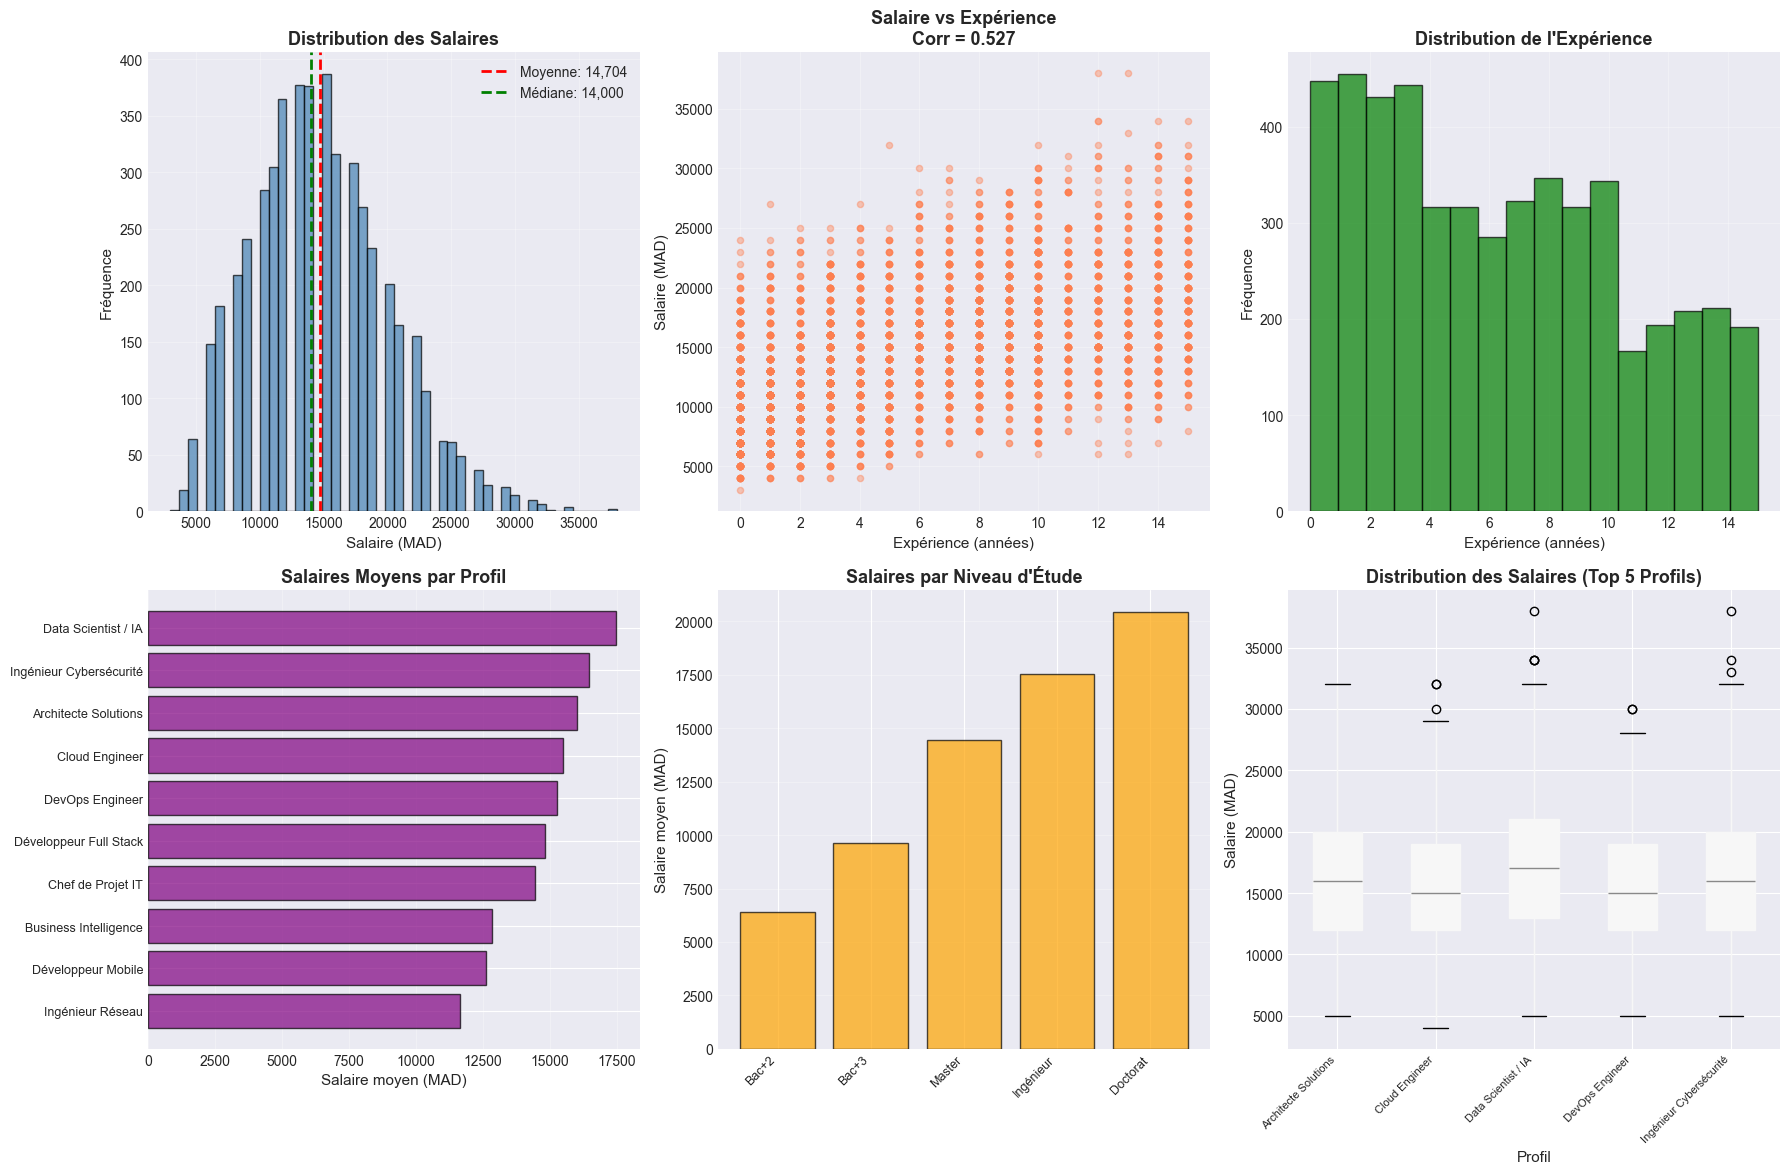

📊 Visualisations générées avec succès!


In [6]:
# Graphiques d'analyse
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Distribution des salaires
axes[0, 0].hist(data['Salaire'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].axvline(data['Salaire'].mean(), color='red', linestyle='--', linewidth=2, label=f"Moyenne: {data['Salaire'].mean():,.0f}")
axes[0, 0].axvline(data['Salaire'].median(), color='green', linestyle='--', linewidth=2, label=f"Médiane: {data['Salaire'].median():,.0f}")
axes[0, 0].set_xlabel('Salaire (MAD)', fontsize=11)
axes[0, 0].set_ylabel('Fréquence', fontsize=11)
axes[0, 0].set_title('Distribution des Salaires', fontsize=13, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Salaire vs Expérience
axes[0, 1].scatter(data['Experience'], data['Salaire'], alpha=0.4, s=20, color='coral')
axes[0, 1].set_xlabel('Expérience (années)', fontsize=11)
axes[0, 1].set_ylabel('Salaire (MAD)', fontsize=11)
axes[0, 1].set_title(f'Salaire vs Expérience\nCorr = {correlation:.3f}', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Distribution de l'expérience
axes[0, 2].hist(data['Experience'], bins=16, edgecolor='black', alpha=0.7, color='green')
axes[0, 2].set_xlabel('Expérience (années)', fontsize=11)
axes[0, 2].set_ylabel('Fréquence', fontsize=11)
axes[0, 2].set_title('Distribution de l\'Expérience', fontsize=13, fontweight='bold')
axes[0, 2].grid(True, alpha=0.3)

# 4. Salaires par profil
salaire_profil = data.groupby('Profil')['Salaire'].mean().sort_values()
axes[1, 0].barh(range(len(salaire_profil)), salaire_profil.values, color='purple', alpha=0.7, edgecolor='black')
axes[1, 0].set_yticks(range(len(salaire_profil)))
axes[1, 0].set_yticklabels(salaire_profil.index, fontsize=9)
axes[1, 0].set_xlabel('Salaire moyen (MAD)', fontsize=11)
axes[1, 0].set_title('Salaires Moyens par Profil', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='x')

# 5. Salaires par niveau d'étude
salaire_niveau = data.groupby('Niveau_Etude')['Salaire'].mean().sort_values()
axes[1, 1].bar(range(len(salaire_niveau)), salaire_niveau.values, color='orange', alpha=0.7, edgecolor='black')
axes[1, 1].set_xticks(range(len(salaire_niveau)))
axes[1, 1].set_xticklabels(salaire_niveau.index, rotation=45, ha='right', fontsize=9)
axes[1, 1].set_ylabel('Salaire moyen (MAD)', fontsize=11)
axes[1, 1].set_title('Salaires par Niveau d\'Étude', fontsize=13, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')

# 6. Boxplot par profil
top_profils = data.groupby('Profil')['Salaire'].mean().nlargest(5).index
data_top = data[data['Profil'].isin(top_profils)]
data_top.boxplot(column='Salaire', by='Profil', ax=axes[1, 2], patch_artist=True)
axes[1, 2].set_xlabel('Profil', fontsize=11)
axes[1, 2].set_ylabel('Salaire (MAD)', fontsize=11)
axes[1, 2].set_title('Distribution des Salaires (Top 5 Profils)', fontsize=13, fontweight='bold')
axes[1, 2].set_xticklabels(axes[1, 2].get_xticklabels(), rotation=45, ha='right', fontsize=8)
plt.suptitle('')

plt.tight_layout()
plt.show()

print("📊 Visualisations générées avec succès!")

## 5️⃣ Préparation des Données - One-Hot Encoding

In [7]:
# Sauvegarde des valeurs uniques pour l'inférence
entreprises_list = sorted(data['Entreprise'].unique())
profils_list = sorted(data['Profil'].unique())
niveaux_list = sorted(data['Niveau_Etude'].unique())
technologies_list = sorted(data['Technologie'].unique())

print(f"📊 Variables catégorielles:")
print(f"   Entreprises:    {len(entreprises_list)}")
print(f"   Profils:        {len(profils_list)}")
print(f"   Niveaux:        {len(niveaux_list)}")
print(f"   Technologies:   {len(technologies_list)}")

# Application du One-Hot Encoding
print(f"\n🔄 Application du One-Hot Encoding...")
print(f"   Avant: {data.shape}")

data_encoded = pd.get_dummies(data, 
                               columns=['Entreprise', 'Profil', 'Niveau_Etude', 'Technologie'], 
                               drop_first=False)

print(f"   Après: {data_encoded.shape}")
print(f"   Features créées: {data_encoded.shape[1] - 2}")

print(f"\n✅ One-Hot Encoding terminé!")
print(f"\n🔍 Colonnes encodées (sample):")
print(list(data_encoded.columns[:10]))

📊 Variables catégorielles:
   Entreprises:    20
   Profils:        10
   Niveaux:        5
   Technologies:   65

🔄 Application du One-Hot Encoding...
   Avant: (5000, 6)
   Après: (5000, 102)
   Features créées: 100

✅ One-Hot Encoding terminé!

🔍 Colonnes encodées (sample):
['Experience', 'Salaire', 'Entreprise_Accenture Maroc', 'Entreprise_Atos Maroc', 'Entreprise_CGI Maroc', 'Entreprise_Capgemini Maroc', 'Entreprise_Cisco Maroc', 'Entreprise_Dell Technologies Maroc', 'Entreprise_Deloitte Digital Maroc', 'Entreprise_EY Digital Maroc']


## 6️⃣ Séparation Train/Test

In [8]:
# Séparation features et target
X = data_encoded.drop('Salaire', axis=1).values
y = data_encoded['Salaire'].values.reshape(-1, 1)

print(f"📐 Dimensions:")
print(f"   X (features): {X.shape}")
print(f"   y (target):   {y.shape}")

# Sauvegarde des noms de colonnes
feature_columns = data_encoded.drop('Salaire', axis=1).columns.tolist()
print(f"\n✅ {len(feature_columns)} colonnes de features sauvegardées")

# Split train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\n✂️ Division Train/Test (80/20):")
print(f"   X_train: {X_train.shape}")
print(f"   X_test:  {X_test.shape}")
print(f"   y_train: {y_train.shape}")
print(f"   y_test:  {y_test.shape}")

📐 Dimensions:
   X (features): (5000, 101)
   y (target):   (5000, 1)

✅ 101 colonnes de features sauvegardées

✂️ Division Train/Test (80/20):
   X_train: (4000, 101)
   X_test:  (1000, 101)
   y_train: (4000, 1)
   y_test:  (1000, 1)


## 7️⃣ Normalisation Z-Score

In [9]:
def z_score_normalization(data):
    """
    Normalise les données avec la méthode Z-score
    
    Args:
        data: tableau numpy à normaliser
    
    Returns:
        data_norm: données normalisées
        mean: moyennes
        std: écarts-types
    """
    data = np.asarray(data, dtype=np.float64)
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0, ddof=0)
    std = np.where(std == 0, 1, std)  # Éviter division par zéro
    data_norm = (data - mean) / std
    return data_norm, mean, std

print("✅ Fonction de normalisation définie")

✅ Fonction de normalisation définie


In [10]:
# Normalisation des données
X_train_norm, mean, std = z_score_normalization(X_train)
X_test_norm = (np.asarray(X_test, dtype=np.float64) - mean) / std

print("📊 Vérification de la normalisation:")
print(f"   Moyenne (doit être ≈ 0): {X_train_norm.mean(axis=0)[:3]}")
print(f"   Std (doit être ≈ 1):     {X_train_norm.std(axis=0)[:3]}")
print("\n✅ Normalisation terminée")

📊 Vérification de la normalisation:
   Moyenne (doit être ≈ 0): [-1.70155556e-16 -2.87353474e-16 -2.72740164e-16]
   Std (doit être ≈ 1):     [1. 1. 1.]

✅ Normalisation terminée


In [11]:
# Ajout de la colonne de biais (intercept)
X_train_final = np.hstack((X_train_norm, np.ones((X_train_norm.shape[0], 1))))
X_test_final = np.hstack((X_test_norm, np.ones((X_test_norm.shape[0], 1))))

print("📐 Dimensions finales (avec biais):")
print(f"   X_train_final: {X_train_final.shape}")
print(f"   X_test_final:  {X_test_final.shape}")

📐 Dimensions finales (avec biais):
   X_train_final: (4000, 102)
   X_test_final:  (1000, 102)


## 8️⃣ Modèle de Régression Linéaire (From Scratch)

In [12]:
def model(X, theta):
    """Calcule les prédictions: ŷ = X·θ"""
    return X.dot(theta)

def cost_function(X, y, theta):
    """Calcule le coût (MSE)"""
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

def grad(X, y, theta):
    """Calcule le gradient"""
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

def gradient_descent(X, y, theta, learning_rate, n_iterations):
    """
    Descente de gradient pour optimiser theta
    
    Args:
        X: matrice des features
        y: vecteur des targets
        theta: paramètres initiaux
        learning_rate: taux d'apprentissage
        n_iterations: nombre d'itérations
    
    Returns:
        theta: paramètres optimisés
        cost_history: historique du coût
    """
    cost_history = np.zeros(n_iterations)
    
    for i in range(n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
        
        # Affichage du progrès tous les 1000 itérations
        if (i + 1) % 1000 == 0:
            print(f"   Itération {i+1:>5}/{n_iterations} - Coût: {cost_history[i]:>12,.2f}")
    
    return theta, cost_history

def coef_determination(y, y_pred):
    """Calcule le coefficient de détermination R²"""
    u = ((y - y_pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

print("✅ Fonctions du modèle définies")

✅ Fonctions du modèle définies


## 9️⃣ Entraînement du Modèle

In [13]:
print("="*70)
print("ENTRAÎNEMENT DU MODÈLE - DESCENTE DE GRADIENT".center(70))
print("="*70)

# Initialisation de theta (aléatoire)
n_features = X_train_final.shape[1]
theta_initial = np.random.randn(n_features, 1)

# Paramètres de la descente de gradient
learning_rate = 0.01
n_iterations = 10000

print(f"\n⚙️ Paramètres d'entraînement:")
print(f"   Learning rate:        {learning_rate}")
print(f"   Nombre d'itérations:  {n_iterations}")
print(f"   Nombre de features:   {n_features}")
print(f"   Exemples d'entraînement: {len(X_train_final)}")

print(f"\n🔄 Entraînement en cours...")

# Entraînement
theta_final, cost_history = gradient_descent(X_train_final, y_train, theta_initial, learning_rate, n_iterations)

print(f"\n✅ Entraînement terminé!")
print(f"   Dimensions de theta: {theta_final.shape}")
print(f"   Coût initial:  {cost_history[0]:>12,.2f}")
print(f"   Coût final:    {cost_history[-1]:>12,.2f}")
print(f"   Réduction:     {((cost_history[0] - cost_history[-1]) / cost_history[0] * 100):>12.2f}%")

            ENTRAÎNEMENT DU MODÈLE - DESCENTE DE GRADIENT             

⚙️ Paramètres d'entraînement:
   Learning rate:        0.01
   Nombre d'itérations:  10000
   Nombre de features:   102
   Exemples d'entraînement: 4000

🔄 Entraînement en cours...
   Itération  1000/10000 - Coût: 1,061,684.44
   Itération  2000/10000 - Coût: 1,058,915.89
   Itération  3000/10000 - Coût: 1,058,403.54
   Itération  4000/10000 - Coût: 1,058,308.66
   Itération  5000/10000 - Coût: 1,058,291.09
   Itération  6000/10000 - Coût: 1,058,287.83
   Itération  7000/10000 - Coût: 1,058,287.23
   Itération  8000/10000 - Coût: 1,058,287.12
   Itération  9000/10000 - Coût: 1,058,287.10
   Itération 10000/10000 - Coût: 1,058,287.10

✅ Entraînement terminé!
   Dimensions de theta: (102, 1)
   Coût initial:  120,509,444.32
   Coût final:    1,058,287.10
   Réduction:            99.12%


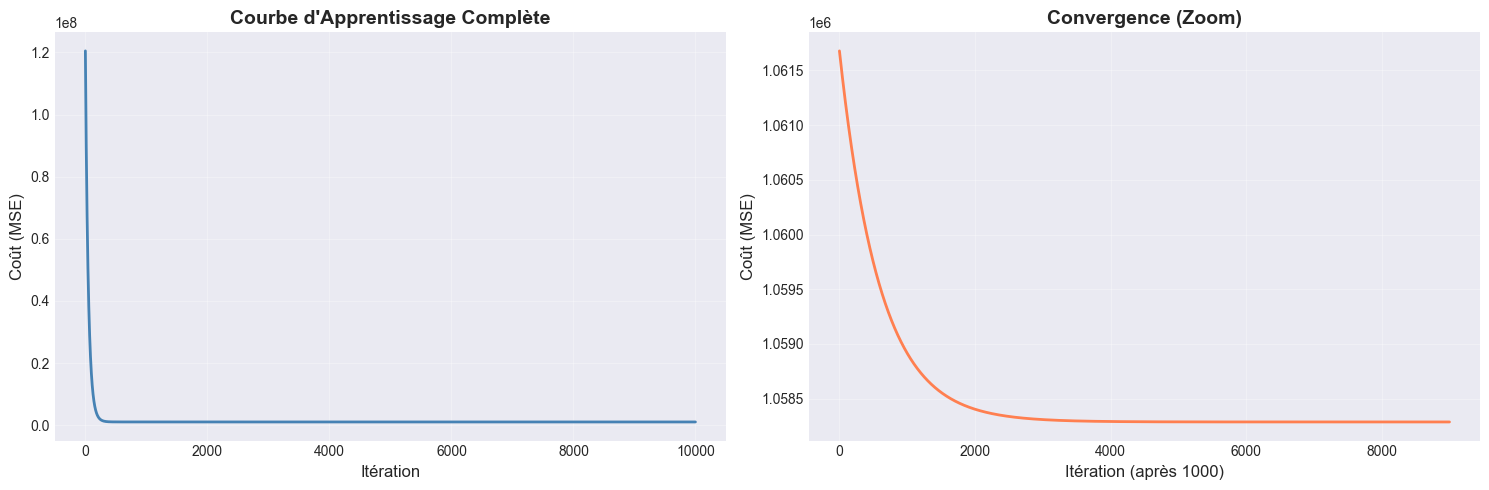

📊 Convergence du modèle visualisée


In [14]:
# Visualisation de la courbe d'apprentissage
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Courbe complète
axes[0].plot(cost_history, linewidth=2, color='steelblue')
axes[0].set_xlabel('Itération', fontsize=12)
axes[0].set_ylabel('Coût (MSE)', fontsize=12)
axes[0].set_title('Courbe d\'Apprentissage Complète', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Zoom sur les dernières itérations
axes[1].plot(cost_history[1000:], linewidth=2, color='coral')
axes[1].set_xlabel('Itération (après 1000)', fontsize=12)
axes[1].set_ylabel('Coût (MSE)', fontsize=12)
axes[1].set_title('Convergence (Zoom)', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Convergence du modèle visualisée")

## 🔟 Évaluation du Modèle

In [15]:
# Prédictions
y_train_pred = model(X_train_final, theta_final)
y_test_pred = model(X_test_final, theta_final)

# Métriques
r2_train = coef_determination(y_train, y_train_pred)
r2_test = coef_determination(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("="*70)
print("RÉSULTATS DU MODÈLE".center(70))
print("="*70)

print(f"\n📊 Coefficient de détermination R²:")
print(f"   R² Train: {r2_train:.4f} ({r2_train*100:.2f}%)")
print(f"   R² Test:  {r2_test:.4f} ({r2_test*100:.2f}%)")

# Évaluation de la qualité
if r2_test >= 0.80:
    quality = "EXCELLENT ✨"
    emoji = "🟢"
elif r2_test >= 0.70:
    quality = "BON ✅"
    emoji = "🟢"
elif r2_test >= 0.50:
    quality = "ACCEPTABLE ⚠️"
    emoji = "🟡"
else:
    quality = "FAIBLE ❌"
    emoji = "🔴"

print(f"\n{emoji} Qualité du modèle: {quality}")

print(f"\n📉 Métriques d'erreur:")
print(f"   MAE (Erreur Absolue Moyenne):  {mae_test:>10,.2f} MAD")
print(f"   RMSE (Racine MSE):             {rmse_test:>10,.2f} MAD")
print(f"   Erreur relative:               {(mae_test/y_test.mean())*100:>10.1f}%")

print("\n" + "="*70)

                         RÉSULTATS DU MODÈLE                          

📊 Coefficient de détermination R²:
   R² Train: 0.9262 (92.62%)
   R² Test:  0.9169 (91.69%)

🟢 Qualité du modèle: EXCELLENT ✨

📉 Métriques d'erreur:
   MAE (Erreur Absolue Moyenne):    1,193.44 MAD
   RMSE (Racine MSE):               1,495.90 MAD
   Erreur relative:                      8.2%



## 1️⃣1️⃣ Visualisations des Résultats

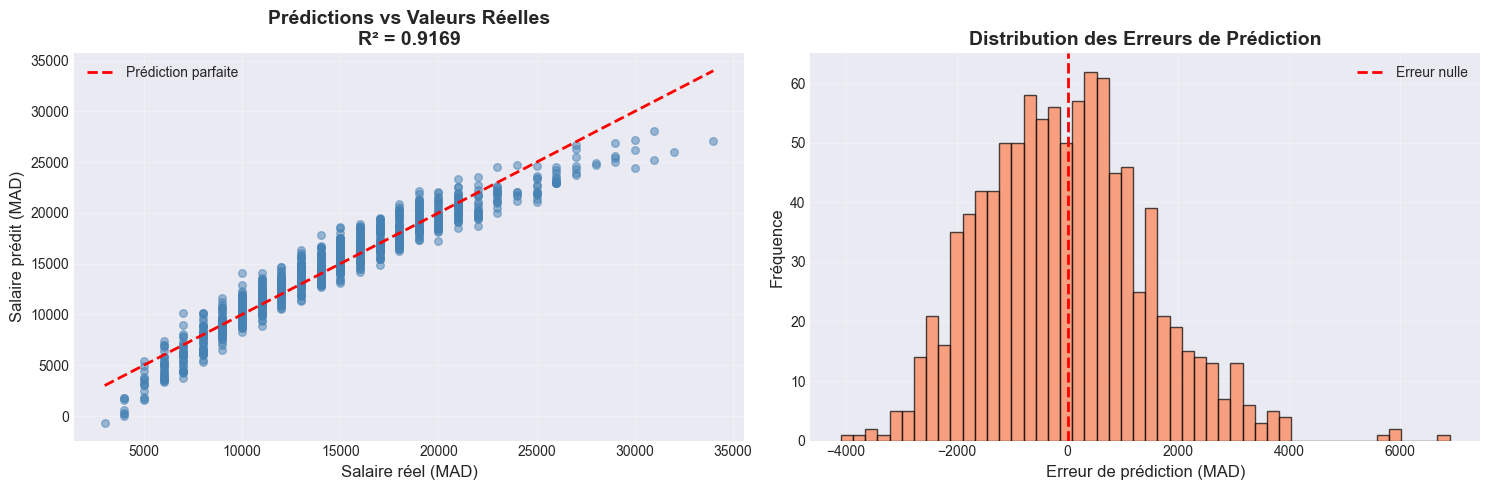


📊 Statistiques des erreurs:
   Erreur moyenne:   -41.01 MAD
   Écart-type:     1,495.34 MAD
   Erreur min:     -4,094.79 MAD
   Erreur max:     6,894.97 MAD


In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Graphique 1: Prédictions vs Valeurs réelles
axes[0].scatter(y_test, y_test_pred, alpha=0.5, s=30, color='steelblue')
axes[0].plot([y_test.min(), y_test.max()], 
             [y_test.min(), y_test.max()], 
             'r--', lw=2, label='Prédiction parfaite')
axes[0].set_xlabel('Salaire réel (MAD)', fontsize=12)
axes[0].set_ylabel('Salaire prédit (MAD)', fontsize=12)
axes[0].set_title(f'Prédictions vs Valeurs Réelles\nR² = {r2_test:.4f}', 
                  fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Graphique 2: Distribution des erreurs
errors = y_test - y_test_pred
axes[1].hist(errors, bins=50, edgecolor='black', alpha=0.7, color='coral')
axes[1].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Erreur nulle')
axes[1].set_xlabel('Erreur de prédiction (MAD)', fontsize=12)
axes[1].set_ylabel('Fréquence', fontsize=12)
axes[1].set_title('Distribution des Erreurs de Prédiction', 
                  fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 Statistiques des erreurs:")
print(f"   Erreur moyenne: {errors.mean():>8,.2f} MAD")
print(f"   Écart-type:     {errors.std():>8,.2f} MAD")
print(f"   Erreur min:     {errors.min():>8,.2f} MAD")
print(f"   Erreur max:     {errors.max():>8,.2f} MAD")

## 1️⃣2️⃣ Exemples de Prédictions

In [17]:
print("🔍 EXEMPLES DE PRÉDICTIONS")
print("="*70)
print(f"{'Salaire Réel':<20} {'Salaire Prédit':<20} {'Erreur':<20}")
print("="*70)

for i in range(min(25, len(y_test))):
    real = y_test[i][0]
    pred = y_test_pred[i][0]
    error = real - pred
    error_pct = (abs(error) / real) * 100
    print(f"{real:>15,.0f} MAD   {pred:>15,.0f} MAD   {error:>15,.0f} MAD ({error_pct:>5.1f}%)")

🔍 EXEMPLES DE PRÉDICTIONS
Salaire Réel         Salaire Prédit       Erreur              
         20,000 MAD            17,234 MAD             2,766 MAD ( 13.8%)
         15,000 MAD            16,147 MAD            -1,147 MAD (  7.6%)
         19,000 MAD            19,376 MAD              -376 MAD (  2.0%)
         11,000 MAD            10,893 MAD               107 MAD (  1.0%)
          8,000 MAD             8,110 MAD              -110 MAD (  1.4%)
         21,000 MAD            22,512 MAD            -1,512 MAD (  7.2%)
         21,000 MAD            21,009 MAD                -9 MAD (  0.0%)
         15,000 MAD            16,130 MAD            -1,130 MAD (  7.5%)
          4,000 MAD               226 MAD             3,774 MAD ( 94.3%)
         13,000 MAD            14,196 MAD            -1,196 MAD (  9.2%)
         15,000 MAD            15,207 MAD              -207 MAD (  1.4%)
         13,000 MAD            13,066 MAD               -66 MAD (  0.5%)
         15,000 MAD            15,6

## 1️⃣3️⃣ Sauvegarde du Modèle

In [18]:
# Création du dictionnaire des paramètres
model_params = {
    'theta': theta_final,
    'mean': mean,
    'std': std,
    'feature_columns': feature_columns,
    'entreprises_list': entreprises_list,
    'profils_list': profils_list,
    'niveaux_list': niveaux_list,
    'technologies_list': technologies_list,
    'r2_train': r2_train,
    'r2_test': r2_test,
    'mae_test': mae_test,
    'rmse_test': rmse_test,
    'learning_rate': learning_rate,
    'n_iterations': n_iterations
}

# Sauvegarde avec pickle
filename = 'model_salaire_IT_MAROC_2025.pkl'
with open(filename, 'wb') as f:
    pickle.dump(model_params, f)

print("💾 MODÈLE SAUVEGARDÉ")
print("="*70)
print(f"\n✅ Fichier créé: {filename}")
print(f"\n📦 Contenu du modèle:")
print(f"   - Theta (paramètres):        {theta_final.shape}")
print(f"   - Mean (normalisation):      {mean.shape}")
print(f"   - Std (normalisation):       {std.shape}")
print(f"   - Feature columns:           {len(feature_columns)} colonnes")
print(f"   - Entreprises:               {len(entreprises_list)}")
print(f"   - Profils:                   {len(profils_list)}")
print(f"   - Niveaux:                   {len(niveaux_list)}")
print(f"   - Technologies:              {len(technologies_list)}")
print(f"   - Learning rate:             {learning_rate}")
print(f"   - Itérations:                {n_iterations}")
print(f"\n📊 Performances:")
print(f"   - R² Train: {r2_train:.4f} ({r2_train*100:.2f}%)")
print(f"   - R² Test:  {r2_test:.4f} ({r2_test*100:.2f}%)")
print(f"   - MAE:      {mae_test:,.2f} MAD")
print(f"   - RMSE:     {rmse_test:,.2f} MAD")

💾 MODÈLE SAUVEGARDÉ

✅ Fichier créé: model_salaire_IT_MAROC_2025.pkl

📦 Contenu du modèle:
   - Theta (paramètres):        (102, 1)
   - Mean (normalisation):      (101,)
   - Std (normalisation):       (101,)
   - Feature columns:           101 colonnes
   - Entreprises:               20
   - Profils:                   10
   - Niveaux:                   5
   - Technologies:              65
   - Learning rate:             0.01
   - Itérations:                10000

📊 Performances:
   - R² Train: 0.9262 (92.62%)
   - R² Test:  0.9169 (91.69%)
   - MAE:      1,193.44 MAD
   - RMSE:     1,495.90 MAD


## 1️⃣4️⃣ Fonction de Prédiction pour Streamlit

In [19]:
def predict_salary_maroc(entreprise, profil, experience, niveau_etude, technologie, model_params):
    """
    Prédit le salaire d'un professionnel IT au Maroc
    
    Args:
        entreprise: nom de l'entreprise
        profil: profil IT (Data Scientist, DevOps, etc.)
        experience: années d'expérience (nombre)
        niveau_etude: niveau d'étude
        technologie: technologie/compétence
        model_params: dictionnaire des paramètres du modèle
    
    Returns:
        salaire prédit en MAD/mois
    """
    # Récupération des paramètres
    theta = model_params['theta']
    mean = model_params['mean']
    std = model_params['std']
    feature_columns = model_params['feature_columns']
    
    # Vérifier que les valeurs existent
    if entreprise not in model_params['entreprises_list']:
        return None, f"Erreur: Entreprise '{entreprise}' non reconnue"
    if profil not in model_params['profils_list']:
        return None, f"Erreur: Profil '{profil}' non reconnu"
    if niveau_etude not in model_params['niveaux_list']:
        return None, f"Erreur: Niveau d'étude '{niveau_etude}' non reconnu"
    if technologie not in model_params['technologies_list']:
        return None, f"Erreur: Technologie '{technologie}' non reconnue"
    
    # Créer un DataFrame avec les mêmes colonnes
    input_data = pd.DataFrame({
        'Entreprise': [entreprise],
        'Profil': [profil],
        'Experience': [experience],
        'Niveau_Etude': [niveau_etude],
        'Technologie': [technologie],
        'Salaire': [0]
    })
    
    # One-Hot Encoding
    input_encoded = pd.get_dummies(input_data, 
                                    columns=['Entreprise', 'Profil', 'Niveau_Etude', 'Technologie'],
                                    drop_first=False)
    
    # Supprimer la colonne salaire
    input_encoded = input_encoded.drop('Salaire', axis=1)
    
    # Ajouter les colonnes manquantes
    for col in feature_columns:
        if col not in input_encoded.columns:
            input_encoded[col] = 0
    
    # Réorganiser les colonnes
    input_encoded = input_encoded[feature_columns]
    
    # Convertir en numpy array
    X_input = input_encoded.values
    
    # Normalisation
    X_input_norm = (X_input - mean) / std
    
    # Ajouter la colonne de biais
    X_input_final = np.hstack((X_input_norm, np.ones((1, 1))))
    
    # Prédiction
    salaire_pred = X_input_final.dot(theta)[0][0]
    
    return salaire_pred, None

print("✅ Fonction de prédiction définie")

✅ Fonction de prédiction définie


## 1️⃣5️⃣ Tests de la Fonction

In [20]:
print("🧪 TEST DE LA FONCTION DE PRÉDICTION")
print("="*70)

# Test 1: Junior
salaire1, _ = predict_salary_maroc(
    entreprise='Capgemini Maroc',
    profil='Développeur Full Stack',
    experience=1,
    niveau_etude='Bac+3',
    technologie='React',
    model_params=model_params
)
print(f"\n📊 Test 1 - Junior:")
print(f"   Profil: Développeur Full Stack, 1 an, Bac+3, React, Capgemini")
print(f"   💰 Salaire prédit: {salaire1:,.2f} MAD/mois")

# Test 2: Mid-level
salaire2, _ = predict_salary_maroc(
    entreprise='Microsoft Maroc',
    profil='Data Scientist / IA',
    experience=5,
    niveau_etude='Ingénieur',
    technologie='Python',
    model_params=model_params
)
print(f"\n📊 Test 2 - Mid-level:")
print(f"   Profil: Data Scientist, 5 ans, Ingénieur, Python, Microsoft")
print(f"   💰 Salaire prédit: {salaire2:,.2f} MAD/mois")

# Test 3: Senior
salaire3, _ = predict_salary_maroc(
    entreprise='Oracle Maroc',
    profil='Ingénieur Cybersécurité',
    experience=10,
    niveau_etude='Master',
    technologie='CISSP',
    model_params=model_params
)
print(f"\n📊 Test 3 - Senior:")
print(f"   Profil: Cybersécurité, 10 ans, Master, CISSP, Oracle")
print(f"   💰 Salaire prédit: {salaire3:,.2f} MAD/mois")

# Test 4: Expert
salaire4, _ = predict_salary_maroc(
    entreprise='SAP Maroc',
    profil='Architecte Solutions',
    experience=12,
    niveau_etude='Doctorat',
    technologie='Enterprise Architecture',
    model_params=model_params
)
print(f"\n📊 Test 4 - Expert:")
print(f"   Profil: Architecte Solutions, 12 ans, Doctorat, EA, SAP")
print(f"   💰 Salaire prédit: {salaire4:,.2f} MAD/mois")

print("\n" + "="*70)

🧪 TEST DE LA FONCTION DE PRÉDICTION

📊 Test 1 - Junior:
   Profil: Développeur Full Stack, 1 an, Bac+3, React, Capgemini
   💰 Salaire prédit: 8,316.69 MAD/mois

📊 Test 2 - Mid-level:
   Profil: Data Scientist, 5 ans, Ingénieur, Python, Microsoft
   💰 Salaire prédit: 24,525.67 MAD/mois

📊 Test 3 - Senior:
   Profil: Cybersécurité, 10 ans, Master, CISSP, Oracle
   💰 Salaire prédit: 21,541.37 MAD/mois

📊 Test 4 - Expert:
   Profil: Architecte Solutions, 12 ans, Doctorat, EA, SAP
   💰 Salaire prédit: 26,331.43 MAD/mois



C:\Program Files\KMSpico\temp\ipykernel_13640\1188558233.py:53: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_encoded[col] = 0
C:\Program Files\KMSpico\temp\ipykernel_13640\1188558233.py:53: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_encoded[col] = 0
C:\Program Files\KMSpico\temp\ipykernel_13640\1188558233.py:53: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis

## 1️⃣6️⃣ Résumé Final

In [21]:
print("="*70)
print("🇲🇦 RÉSUMÉ FINAL - MODÈLE IT MAROC 2025".center(70))
print("="*70)

print(f"\n📊 DONNÉES:")
print(f"   - Dataset:              DATASET_IT_MAROC_2025.csv")
print(f"   - Exemples totaux:      {len(data)}")
print(f"   - Jeu d'entraînement:   {len(X_train_final)} (80%)")
print(f"   - Jeu de test:          {len(X_test_final)} (20%)")
print(f"   - Corrélation exp-sal:  {correlation:.3f}")
print(f"   - Salaires:             {data['Salaire'].min():,} → {data['Salaire'].max():,} MAD")

print(f"\n🎯 FEATURES:")
print(f"   - Nombre total:         {X_train_final.shape[1] - 1}")
print(f"   - Entreprises:          {len(entreprises_list)}")
print(f"   - Profils:              {len(profils_list)}")
print(f"   - Niveaux d'étude:      {len(niveaux_list)}")
print(f"   - Technologies:         {len(technologies_list)}")
print(f"   - Encodage:             One-Hot Encoding")
print(f"   - Normalisation:        Z-Score")

print(f"\n⚙️ MODÈLE:")
print(f"   - Type:                 Régression Linéaire")
print(f"   - Méthode:              Descente de Gradient")
print(f"   - Learning rate:        {learning_rate}")
print(f"   - Itérations:           {n_iterations}")
print(f"   - Implémentation:       From Scratch (NumPy)")

print(f"\n📈 PERFORMANCES:")
print(f"   - R² Train:  {r2_train:.4f} ({r2_train*100:.2f}%)  {emoji}")
print(f"   - R² Test:   {r2_test:.4f} ({r2_test*100:.2f}%)  {emoji}")
print(f"   - MAE:       {mae_test:>7,.2f} MAD")
print(f"   - RMSE:      {rmse_test:>7,.2f} MAD")
print(f"   - Erreur %:  {(mae_test/y_test.mean())*100:>7.1f}%")
print(f"   - Qualité:   {quality}")

print(f"\n💾 FICHIERS GÉNÉRÉS:")
print(f"   - model_salaire_IT_MAROC_2025.pkl")
print(f"   - DATASET_IT_MAROC_2025.csv")

print(f"\n✅ Modèle {quality} prêt pour l'application Streamlit!")
print(f"✅ Basé sur le marché IT marocain réaliste 🇲🇦")
print("="*70)

                🇲🇦 RÉSUMÉ FINAL - MODÈLE IT MAROC 2025                

📊 DONNÉES:
   - Dataset:              DATASET_IT_MAROC_2025.csv
   - Exemples totaux:      5000
   - Jeu d'entraînement:   4000 (80%)
   - Jeu de test:          1000 (20%)
   - Corrélation exp-sal:  0.527
   - Salaires:             3,000 → 38,000 MAD

🎯 FEATURES:
   - Nombre total:         101
   - Entreprises:          20
   - Profils:              10
   - Niveaux d'étude:      5
   - Technologies:         65
   - Encodage:             One-Hot Encoding
   - Normalisation:        Z-Score

⚙️ MODÈLE:
   - Type:                 Régression Linéaire
   - Méthode:              Descente de Gradient
   - Learning rate:        0.01
   - Itérations:           10000
   - Implémentation:       From Scratch (NumPy)

📈 PERFORMANCES:
   - R² Train:  0.9262 (92.62%)  🟢
   - R² Test:   0.9169 (91.69%)  🟢
   - MAE:       1,193.44 MAD
   - RMSE:      1,495.90 MAD
   - Erreur %:      8.2%
   - Qualité:   EXCELLENT ✨

💾 FICHIERS GÉNÉR